# In-Depth: Decision Trees and Random Forests

**Random Forests* son un ejemplo de *ensemble*, lo que significa que se basa en la agregación de los resultados de un conjunto de modelos más simples.
El resultado de estos métodos de conjunto es que la suma puede ser mejor que las partes: es decir, ¡un voto mayoritario entre varios modelos puede acabar siendo mejor que cualquiera de los modelos individuales que realizan la votación!


Comenzamos con los preliminares: importaciones y funciones de visualización

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [ ]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)





    

## Regresion mediante Random Forest 

Los también pueden funcionar en el caso de la regresión (es decir, con variables continuas en lugar de categóricas). El estimador que se utiliza para ello es el ``RandomForestRegressor``.



Consideremos los siguientes datos, extraídos de la combinación de una oscilación rápida y otra lenta:

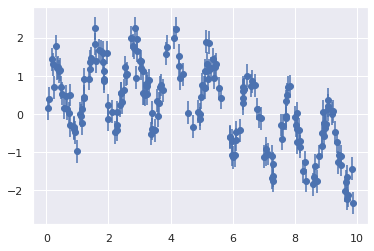

In [ ]:
rng = np.random.RandomState(42)
x = 10 * rng.rand(200)

def model(x, sigma=0.3):
    fast_oscillation = np.sin(5 * x)
    slow_oscillation = np.sin(0.5 * x)
    noise = sigma * rng.randn(len(x))

    return slow_oscillation + fast_oscillation + noise

y = model(x)
plt.errorbar(x, y, 0.3, fmt='o');

Utilizando este modelo se puede encontrar la curva de mejor ajuste como sigue:

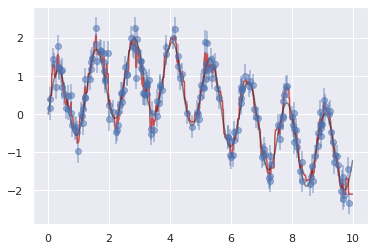

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(200)
forest.fit(x[:, None], y)

xfit = np.linspace(0, 10, 1000)
yfit = forest.predict(xfit[:, None])
ytrue = model(xfit, sigma=0)

plt.errorbar(x, y, 0.3, fmt='o', alpha=0.5)
plt.plot(xfit, yfit, '-r');
plt.plot(xfit, ytrue, '-k', alpha=0.5);

El modelo *real* se muestra en la curva gris suave, mientras que el modelo estimado se muestra en la curva roja irregular. El modelo *Random Forests* no paramétrico es lo suficientemente flexible como para ajustarse a los datos de varios períodos.

## Ejemplo: Random Forest para clasificación de dígitos

Como ejemplo de problema de clasificación vamos a utilizar la clasificación de dígitos escritos a mano (enlace)[https://scikit-learn.org/stable/datasets/toy_dataset.html#digits-dataset]. 


In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

Visualizamos los elementos (imágenes) que conforman este dataset

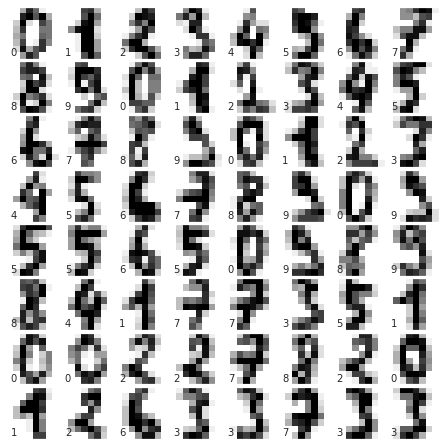

In [ ]:
# set up the figure
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

Podemos clasificar rápidamente los dígitos utilizando un bosque aleatorio de la siguiente manera:

In [ ]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target,
                                                random_state=0)
model = RandomForestClassifier(n_estimators=1000)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

Podemos echar un vistazo al informe de clasificación de este clasificador:

In [ ]:
from sklearn import metrics
print(metrics.classification_report(ypred, ytest))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        38
           1       1.00      0.98      0.99        44
           2       0.95      1.00      0.98        42
           3       0.98      0.98      0.98        45
           4       0.97      1.00      0.99        37
           5       0.98      0.98      0.98        48
           6       1.00      1.00      1.00        52
           7       1.00      0.96      0.98        50
           8       0.96      0.98      0.97        47
           9       0.98      0.98      0.98        47

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



And for good measure, plot the confusion matrix:

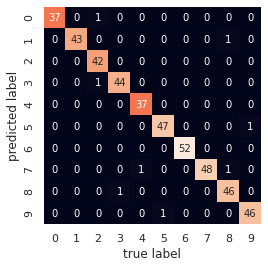

In [ ]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

Comprobamos que un modelo Random Forest simple y sin optimizar como resultado una clasificación muy precisa de los datos de los dígitos.

## Resumen

Esta sección contenía una breve introducción al concepto de *ensembles*, y en particular a los *Random Forests*, un conjunto de árboles de decisión aleatorios.

* Tanto el entrenamiento como la predicción son muy rápidos, debido a la simplicidad de los árboles de decisión subyacentes. Además, ambas tareas pueden paralelizarse directamente, porque los árboles individuales son entidades totalmente independientes.

* Los árboles múltiples permiten una clasificación probabilística: un voto mayoritario entre los modelos da una estimación de la probabilidad.

* El modelo extremadamente flexible y, por lo tanto, puede funcionar bien en tareas que no se ajustan a otros modelos..

Una de las principales desventajas de los *Random Forests* es que los resultados no son fácilmente interpretables: es decir, si desea sacar conclusiones sobre el *significado* del modelo de clasificación, los *Random Forests*  pueden no ser la mejor opción.